In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from matplotlib.ticker import LinearLocator

%matplotlib inline

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Null hypothesis: the number of hurricanes in 2015 is expected basing on known trend.
The selected significance level is α=0.05.

Z=3.4662

The p-value corresponding to the null hypotesis is: 0.001
Since p-value<α the null hypotesis is rejected: the number of hurricanes in 2005 is significantly distant from the historic trend.


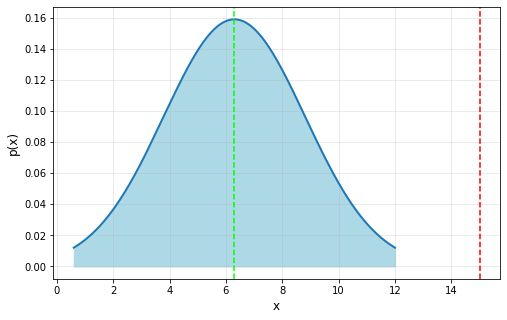

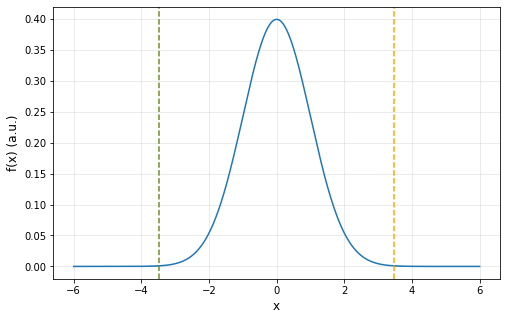

In [20]:
#exercise n.1

print('Null hypothesis: the number of hurricanes in 2015 is expected basing on known trend.')
print('The selected significance level is α=0.05.')

#Possion distribution: std-dev=sqrt(mean)
mu=6.3
sigma=np.sqrt(6.3)
x0=15

Z=abs(x0-mu)/sigma
print('\nZ=%1.4f' %Z )

# plotting the measurement and its assumed pdf
fig, ax1=plt.subplots(figsize=(8, 5))
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('p(x)', fontsize=12)
plt.grid(alpha=0.3)

w=mu-x0
x=np.linspace(mu - w - 3, w + mu + 3, 1000)
y=stats.norm.pdf(x, loc=mu, scale=sigma)

ax1.plot(x, y, linewidth = 2, label = 'p(x)')
ax1.fill_between(x, y, where=np.abs(x - mu) > w, color='lightblue')
ax1.axvline(x0, linestyle='--', color='red')
ax1.axvline(mu, linestyle='--', color='lime')




# plot the test statistics and its pdf
xs=np.linspace(-6, +6, 1000)
ts=stats.norm.pdf(xs)

fig, ax2=plt.subplots(figsize=(8, 5))
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('a.u.', fontsize=12)
plt.grid(alpha=0.3)

ax2.plot(xs, ts)
ax2.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
ax2.axvline(Z, linestyle='--', color='orange')
ax2.axvline(-Z, linestyle='--', color='olivedrab')

#P-VALUE CALCULATION  (as the sum of the left tail + the right tail)
pvalue=stats.norm.cdf(-Z) + (1.-stats.norm.cdf(Z)) 
print('\nThe p-value corresponding to the null hypotesis is: %1.3f' % pvalue)
print('Since p-value<α the null hypotesis is rejected: the number of hurricanes in 2005 is significantly distant from the historic trend.')


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

Null hypothesis: halogen lighting exposure does not affect blood pressure.
The selected significance level is α=0.05.

T=-3.7870

The p-value corresponding to the null hypotesis is: 0.004
Since p-value<α the null hypotesis is rejected: halogen lighting exposure might affect blood pressure.


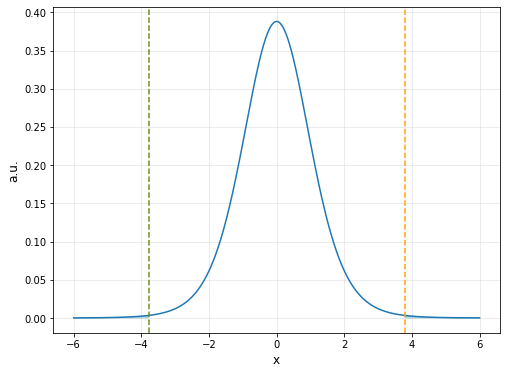

In [28]:
#exercise n.2

print('Null hypothesis: halogen lighting exposure does not affect blood pressure.')
print('The selected significance level is α=0.05.')

pre=np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post=np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n=10
mean_pre, mean_post=np.mean(pre), np.mean(post)
sigma_pre, sigma_post=np.sqrt(np.var(pre, ddof=1)), np.sqrt(np.var(post, ddof=1))
                                                            
sigma=np.sqrt((sigma_pre**2+sigma_post**2)/2)
T=(mean_pre-mean_post)/(sigma*np.sqrt(2/n))
print('\nT=%1.4f' %T)        


# plot the test statistics and its pdf
xs=np.linspace(-6, +6, 1000)
ts=stats.t.pdf(xs, n-1)

fig, ax=plt.subplots(figsize=(8, 6))
ax.plot(xs, ts)
ax.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
ax.axvline(T, linestyle='--', color='olivedrab')
ax.axvline(-T, linestyle='--', color='orange')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('a.u.', fontsize=12)
ax.grid(alpha=0.3)

pvalue=stats.t.cdf(T, n-1) + (1.-stats.t.cdf(-T, n-1))
print('\nThe p-value corresponding to the null hypotesis is: %1.3f' % pvalue)
print('Since p-value<α the null hypotesis is rejected: halogen lighting exposure might affect blood pressure.')

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [ ]:
#exercise n.3



4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

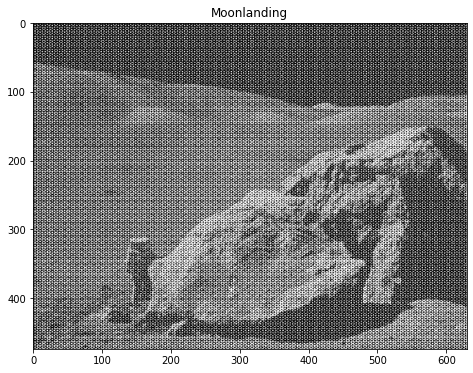

In [63]:
#exercise n.4

image=plt.imread('data/moonlanding.png')
plt.figure(figsize=(12,6))
plt.imshow(image, plt.cm.gray)
plt.title("Moonlanding");

Text(0.5, 1.0, 'Reconstructed Image')

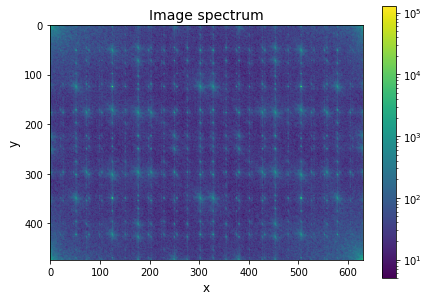

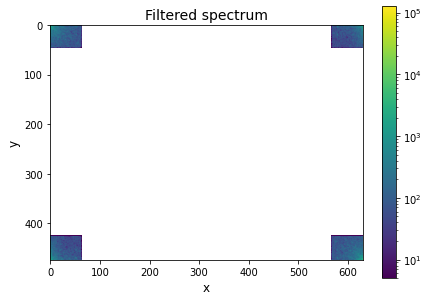

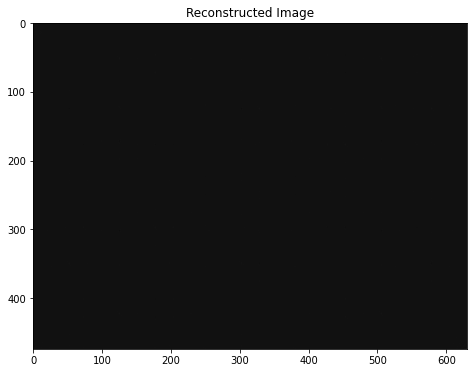

In [76]:
from scipy import fftpack
from matplotlib.colors import LogNorm

#Obtaining the power spectrum and plotting it 
fft2d_image=fftpack.fft2(image)
power_spectrum=np.abs(fft2d_image) #transforming the complex object

fig, ax=plt.subplots(figsize=(7, 5))
ps=ax.imshow(power_spectrum, norm=LogNorm(vmin=5))
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Image spectrum', fontsize=14)
plt.colorbar(ps)


power_spectrum_copy=power_spectrum.copy()
row, col=power_spectrum_copy.shape

#To filter the noisy regions a low pass filter is applied. The goal is to remove the high (noisy) frequencies from  
#the spectrum by setting those components to zero. 
#To do this all the less noisy regions are first set to zero.

fraction=0.1
power_spectrum_copy[int(row*fraction):int(row*(1-fraction)), :]=0 
power_spectrum_copy[:, int(col*fraction):int(col*(1-fraction))]=0 

#Plotting the high energies regions selected
fig, ax1=plt.subplots(figsize=(7, 5))
fs=ax1.imshow(np.abs(power_spectrum_copy), norm=LogNorm(vmin=5))
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Filtered spectrum', fontsize=14)
plt.colorbar(fs)


#zeros=np.argwhere(power_spectrum_copy==0)#obtaining an array of high frequencies positions found
modifying_image=fft2d_image.copy()
#for i,j in zeros:
#    modifying_image[i,j] = 0
    

final_image=fftpack.ifft2(modifying_image)
real_final_image=np.real(modifying_image)

plt.figure(figsize=(12,6))
plt.imshow(real_final_image, plt.cm.gray)
plt.title('Reconstructed Image')